In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [314]:
data = pd.read_csv('../data/csv/cleaned/ta-batik-clean.csv')
data.head()

,text,label
0,Pesawat harus nya berangkat jam 5:20am di Hali...,0
1,Sudah kedua kali penerbangan menggunakan Batik...,0
2,"Super bad experience, flight jam 4 sore dari s...",0
3,BURUK BURUK BURUK.. sy order tiket jkt - kenda...,0
4,"Checkin tidak terima label priority, kemudian ...",0


In [315]:
label_counts = data['label'].value_counts()
print('Jumlah data pada setiap nilai label:\n', label_counts)

Jumlah data pada setiap nilai label:
 1    283
0    141
Name: label, dtype: int64


In [316]:
print("Jumlah data: ", len(data))
print("Jumlah ulasan positif: ", data['label'].value_counts()[1])
print("Jumlah ulasan negatif: ", data['label'].value_counts()[0])

Jumlah data:  424
Jumlah ulasan positif:  283
Jumlah ulasan negatif:  141


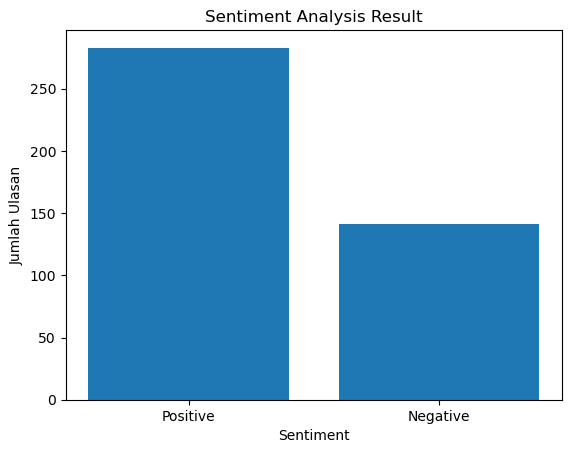

In [317]:
jumlah_positif = data['label'].value_counts()[1]
jumlah_negatif = data['label'].value_counts()[0]

plt.bar(['Positive', 'Negative'], [jumlah_positif, jumlah_negatif])
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [318]:
import re

def casefolding(text):
    text = text.lower()                                # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)            # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                 # Menghapus karakter tanda baca
    text = text.strip()
    return text
data['text'] = data['text'].apply(casefolding)


In [319]:
print(data['text'].head())

0    pesawat harus nya berangkat jam am di halim ma...
1    sudah kedua kali penerbangan menggunakan batik...
2    super bad experience flight jam  sore dari sem...
3    buruk buruk buruk sy order tiket jkt  kendari ...
4    checkin tidak terima label priority kemudian h...
Name: text, dtype: object


In [320]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

more_stopword=['href','a','b','br']
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
    clean_words=[]
    text=text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [321]:
print(data['text'])

0      pesawat harus nya berangkat jam am di halim ma...
1      sudah kedua kali penerbangan menggunakan batik...
2      super bad experience flight jam  sore dari sem...
3      buruk buruk buruk sy order tiket jkt  kendari ...
4      checkin tidak terima label priority kemudian h...
                             ...                        
419    perjalanan dari kupang ke jakarta dalam waktu ...
420    cobalah untuk membawa power bank ditakutkan me...
421    batik air adalah pilihan yang tepat jika anda ...
422    saya sudah beberapa kali menggunakan batik air...
423    batik air menjadi pilihan dibandingkan sodaran...
Name: text, Length: 424, dtype: object


In [322]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [323]:
raw_sample = data['text'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  tiket boarding pass saya tidak muncul di layar  malah dinyatakan hangus  saya mau uang saya kembalikan
Case folding		:  tiket boarding pass saya tidak muncul di layar  malah dinyatakan hangus  saya mau uang saya kembalikan
Stopword removal	:  tiket boarding pass muncul layar dinyatakan hangus uang kembalikan
Stemming		:  tiket boarding pass muncul layar nyata hangus uang kembali


In [324]:
def text_preprocessing_process(text):
    text=casefolding(text)
    text=remove_stop_words(text)
    text=stemming(text)
    return text

In [325]:
%%time
data['clean_text']=data['text'].apply(text_preprocessing_process)

CPU times: total: 3min 39s
Wall time: 3min 59s


In [326]:
import nltk
nltk.download('punkt')

data['tokens'] = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))
print(data['tokens'])

0      [pesawat, nya, berangkat, jam, am, halim, mala...
1      [kali, terbang, batik, air, web, checkin, terb...
2      [super, bad, experience, flight, jam, sore, se...
3      [buruk, buruk, buruk, sy, order, tiket, jkt, k...
4      [checkin, terima, label, priority, tunggu, soe...
                             ...                        
419    [jalan, kupang, jakarta, jam, manja, hibur, dl...
420    [coba, bawa, power, bank, takut, alami, ganggu...
421    [batik, air, pilih, suka, jalan, santai, senan...
422    [kali, batik, air, ekonomi, business, class, k...
423    [batik, air, pilih, banding, sodaranya, telat,...
Name: tokens, Length: 424, dtype: object


[nltk_data] Downloading package punkt to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [327]:
data

,text,label,clean_text,tokens
0,pesawat harus nya berangkat jam am di halim ma...,0,pesawat nya berangkat jam am halim malam nya i...,"[pesawat, nya, berangkat, jam, am, halim, mala..."
1,sudah kedua kali penerbangan menggunakan batik...,0,kali terbang batik air web checkin terbang can...,"[kali, terbang, batik, air, web, checkin, terb..."
2,super bad experience flight jam sore dari sem...,0,super bad experience flight jam sore semarang ...,"[super, bad, experience, flight, jam, sore, se..."
3,buruk buruk buruk sy order tiket jkt kendari ...,0,buruk buruk buruk sy order tiket jkt kendari u...,"[buruk, buruk, buruk, sy, order, tiket, jkt, k..."
4,checkin tidak terima label priority kemudian h...,0,checkin terima label priority tunggu soehatta ...,"[checkin, terima, label, priority, tunggu, soe..."
...,...,...,...,...
419,perjalanan dari kupang ke jakarta dalam waktu ...,1,jalan kupang jakarta jam manja hibur dlam pesa...,"[jalan, kupang, jakarta, jam, manja, hibur, dl..."
420,cobalah untuk membawa power bank ditakutkan me...,1,coba bawa power bank takut alami ganggu pd lay...,"[coba, bawa, power, bank, takut, alami, ganggu..."
421,batik air adalah pilihan yang tepat jika anda ...,1,batik air pilih suka jalan santai senang pilih...,"[batik, air, pilih, suka, jalan, santai, senan..."
422,saya sudah beberapa kali menggunakan batik air...,1,kali batik air ekonomi business class kali ula...,"[kali, batik, air, ekonomi, business, class, k..."


In [328]:
data.to_csv('../data/csv/cleaned/lion-w2v-trial.csv')

In [329]:
import gensim
gensim.__version__

'4.3.0'

In [330]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_text'].apply(lambda x: tokenization(x.lower()))
sentences

0      [pesawat, nya, berangkat, jam, am, halim, mala...
1      [kali, terbang, batik, air, web, checkin, terb...
2      [super, bad, experience, flight, jam, sore, se...
3      [buruk, buruk, buruk, sy, order, tiket, jkt, k...
4      [checkin, terima, label, priority, tunggu, soe...
                             ...                        
419    [jalan, kupang, jakarta, jam, manja, hibur, dl...
420    [coba, bawa, power, bank, takut, alami, ganggu...
421    [batik, air, pilih, suka, jalan, santai, senan...
422    [kali, batik, air, ekonomi, business, class, k...
423    [batik, air, pilih, banding, sodaranya, telat,...
Name: clean_text, Length: 424, dtype: object

In [331]:
MIN_COUNT = 1       # Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
WINDOW = 5          # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah kalimat.
EPOCH = 15          # Jumlah iterasi (epoch).
SG = 1              # Algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW.
SIZE = 5

In [332]:
%%time 
model_word2vec = gensim.models.Word2Vec(sentences, vector_size=SIZE, sg=SG, min_count=MIN_COUNT, window=WINDOW, epochs=EPOCH)

CPU times: total: 906 ms
Wall time: 746 ms


In [333]:
path = "word2vec.bin.gz"
model_word2vec.wv.save_word2vec_format(path, binary=True)

In [334]:
model_word2vec.wv['telat']

array([ 0.40586555,  0.83757055,  1.137015  , -0.3561784 , -0.49289045],
      dtype=float32)

In [335]:
model_word2vec.wv.most_similar('telat')

[('groupnya', 0.9971911311149597),
 ('juli', 0.9936167001724243),
 ('hubung', 0.9931854605674744),
 ('lihat', 0.9928686618804932),
 ('gin', 0.9925346970558167),
 ('wujud', 0.9921355843544006),
 ('tahu', 0.9904336929321289),
 ('rute', 0.9896239638328552),
 ('pikir', 0.9886869788169861),
 ('management', 0.9884716272354126)]

In [336]:
word_list = ['tepat', 'nyaman', 'bagus', 'ramah', 'senang']
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
word_vectors

array([[ 0.66985345,  1.0030714 ,  0.8135724 , -1.0455927 , -0.24541512],
       [-0.6848343 ,  1.0763259 ,  0.9201174 , -1.4278243 , -0.1593396 ],
       [ 0.33111867,  1.2548689 ,  0.78406656, -1.2846372 , -0.12389681],
       [-0.4835813 ,  1.3522621 ,  0.71541184, -1.287357  , -0.6257027 ],
       [ 0.01853516,  0.80705494,  0.8110394 , -1.3847526 , -0.1232953 ]],
      dtype=float32)

In [337]:
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [338]:
red_word_vectors

array([[ 1.2619826 ,  0.28687426],
       [-1.1096348 , -0.807989  ],
       [ 0.6015393 ,  0.23884818],
       [-0.89176834,  1.3996986 ],
       [ 0.13788113, -1.1174313 ]], dtype=float32)

In [339]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

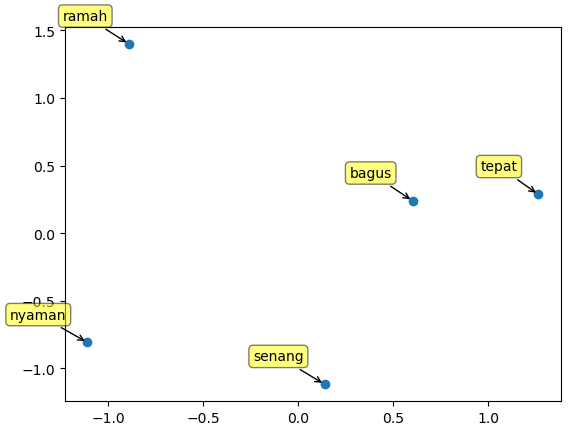

In [340]:
plot(red_word_vectors, word_list)

In [341]:
data1 = data[['clean_text', 'label']]
data1

,clean_text,label
0,pesawat nya berangkat jam am halim malam nya i...,0
1,kali terbang batik air web checkin terbang can...,0
2,super bad experience flight jam sore semarang ...,0
3,buruk buruk buruk sy order tiket jkt kendari u...,0
4,checkin terima label priority tunggu soehatta ...,0
...,...,...
419,jalan kupang jakarta jam manja hibur dlam pesa...,1
420,coba bawa power bank takut alami ganggu pd lay...,1
421,batik air pilih suka jalan santai senang pilih...,1
422,kali batik air ekonomi business class kali ula...,1


In [342]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=5)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=5)

In [343]:
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(254, 4)
(85, 4)
(85, 4)


In [344]:
trainX = np.array(data_train.iloc[:, 0])
trainY = np.array(data_train.iloc[:, 1])

testX = np.array(data_test.iloc[:, 0])
testY = np.array(data_test.iloc[:, 1])

valX = np.array(data_val.iloc[:, 0])
valY = np.array(data_val.iloc[:, 1])

In [345]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values
valY = pd.get_dummies(valY).values

In [346]:
print(trainY.shape)
print(testY.shape)
print(valY.shape)

(254, 2)
(85, 2)
(85, 2)


In [347]:
trainY

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1,

In [348]:
from gensim.models import KeyedVectors

reloaded_word_vectors = KeyedVectors.load_word2vec_format(path, binary=True)
print(reloaded_word_vectors)

KeyedVectors<vector_size=5, 2601 keys>


In [349]:
from keras.preprocessing.text import Tokenizer

NUM_WORDS = 100
OOV_TOKEN = '<unk>'

tokenizer = Tokenizer(num_words=100, oov_token=OOV_TOKEN, lower=True)   
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

word_index = tokenizer.word_index
print(word_index)

{'<unk>': 1, 'dan': 2, 'yang': 3, 'saya': 4, 'batik': 5, 'di': 6, 'air': 7, 'dengan': 8, 'tidak': 9, 'ada': 10, 'pesawat': 11, 'penerbangan': 12, 'untuk': 13, 'ini': 14, 'dari': 15, 'juga': 16, 'maskapai': 17, 'karena': 18, 'ke': 19, 'cukup': 20, 'sangat': 21, 'baik': 22, 'waktu': 23, 'lebih': 24, 'pelayanan': 25, 'penumpang': 26, 'bisa': 27, 'makanan': 28, 'hanya': 29, 'kali': 30, 'saat': 31, 'itu': 32, 'nyaman': 33, 'dalam': 34, 'yg': 35, 'perjalanan': 36, 'nya': 37, 'kursi': 38, 'hiburan': 39, 'menggunakan': 40, 'naik': 41, 'lion': 42, 'jam': 43, 'terbang': 44, 'kami': 45, 'ramah': 46, 'harga': 47, 'tapi': 48, 'seperti': 49, 'in': 50, 'namun': 51, 'fasilitas': 52, 'sudah': 53, 'selama': 54, 'dapat': 55, 'atau': 56, 'pramugari': 57, 'harus': 58, 'delay': 59, 'flight': 60, 'jakarta': 61, 'masih': 62, 'satu': 63, 'kabin': 64, 'kita': 65, 'pilihan': 66, 'tepat': 67, 'layanan': 68, 'sama': 69, 'tv': 70, 'kelas': 71, 'jadi': 72, 'adalah': 73, 'lagi': 74, 'pada': 75, 'enak': 76, 'on': 77, 

In [350]:
len(word_index)

2839

In [351]:
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

print(train_seqs)

[[25, 1, 52, 1, 1, 6, 1, 38, 1, 1, 1, 1, 55, 1, 2, 1, 57, 46, 2, 1, 1], [1, 14, 1, 55, 11, 3, 77, 97, 1, 41, 2, 1, 1, 53, 1, 1, 89, 85, 1, 67, 23, 1, 10, 1, 1, 1, 49, 1, 9, 10, 39, 1, 1, 48, 18, 27, 67, 23, 1, 1, 1, 2, 33], [36, 40, 5, 7, 21, 1, 1, 1, 57, 3, 21, 46, 1, 1, 26, 1, 1, 6, 34, 11], [44, 1, 1, 1, 21, 1, 1, 1, 1, 3, 46, 1, 1, 2, 21, 1, 1, 26, 28, 3, 1, 34, 1, 20, 22, 1, 13, 1, 29, 10, 7, 1, 1, 2, 1, 14, 1, 1, 15, 1, 25, 13, 1, 1, 10, 1, 1, 1, 49, 1, 56, 1], [4, 1, 1, 12, 8, 5, 7, 5, 24, 67, 23, 1, 8, 42, 1, 1, 5, 16, 20, 33, 5, 1, 1, 24, 1, 15, 1, 12, 3, 1, 1, 12, 80, 6, 1, 1, 1, 38, 16, 24, 22, 1, 42, 5, 20, 33, 1, 1, 20, 1], [30, 14, 12, 8, 5, 20, 1, 1, 1, 1, 1, 2, 18, 1, 4, 9, 1, 1, 45, 27, 1, 8, 47, 1, 49, 1, 75, 12, 5, 1, 1, 45, 1, 7, 1, 1, 2, 78, 1, 1, 1, 1, 68, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1], [31, 1, 1, 1, 1, 2, 1, 1, 6, 71, 90, 1, 1, 46, 6, 34, 11, 33, 29, 79, 31, 32, 1, 6, 11, 1, 1, 72, 9, 27, 1, 91], [25, 5, 7, 15, 1, 19, 61, 21, 22, 1, 67, 23, 1, 11, 1, 2, 1, 6, 11,

In [352]:
print(trainX[10])
print(train_seqs[10])

pesawat ini delay sekitar  jam di pesawat tidak ada hiburan biasanya batik ada hiburan film dsb juga tidak ada tempat buat charge hp di pesawat batik yang lain ada untungnya makanan masih diberikan berupa kue dan roti rasa roti dan kue nya standar
[11, 14, 59, 1, 43, 6, 11, 9, 10, 39, 1, 5, 10, 39, 91, 1, 16, 9, 10, 1, 1, 1, 1, 6, 11, 5, 3, 83, 10, 1, 28, 62, 1, 1, 1, 2, 78, 1, 78, 2, 1, 37, 1]


In [353]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

l = [len(i) for i in train_seqs]
l = np.array(l)

print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 15
median number of words: 41.5
average number of words: 62.72834645669291
maximum number of words: 875


In [354]:
PADDING = 'pre'

train_seqs = pad_sequences(train_seqs, padding=PADDING)
val_seqs = pad_sequences(val_seqs, padding=PADDING)
test_seqs = pad_sequences(test_seqs, padding=PADDING)

In [355]:
print(trainX[10])
print(train_seqs[10])

pesawat ini delay sekitar  jam di pesawat tidak ada hiburan biasanya batik ada hiburan film dsb juga tidak ada tempat buat charge hp di pesawat batik yang lain ada untungnya makanan masih diberikan berupa kue dan roti rasa roti dan kue nya standar
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 

In [356]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD

epochs=35
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model= Sequential()
model.add(Embedding(len(word_index),200))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


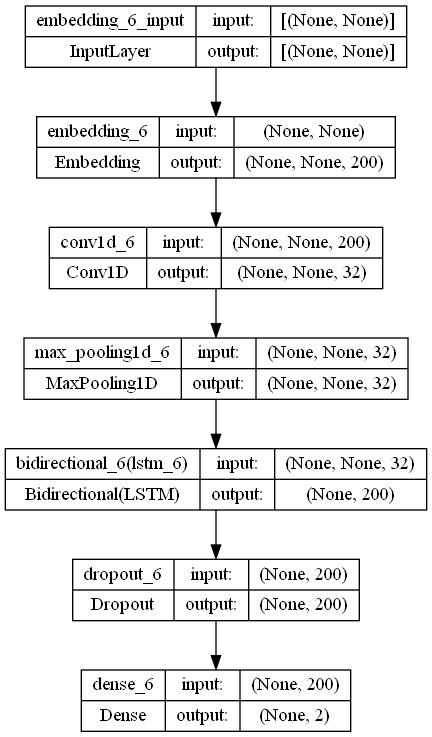

In [357]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [358]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [359]:
%%time

EPOCH = epochs
BATCH_SIZE = 32

history_LSTM = model.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/35
8/8 [==============================] - 11s 765ms/step - loss: 0.6511 - accuracy: 0.6614 - val_loss: 0.6779 - val_accuracy: 0.6235
Epoch 2/35
8/8 [==============================] - 5s 580ms/step - loss: 0.6358 - accuracy: 0.6693 - val_loss: 0.6547 - val_accuracy: 0.6235
Epoch 3/35
8/8 [==============================] - 4s 540ms/step - loss: 0.6228 - accuracy: 0.6693 - val_loss: 0.6525 - val_accuracy: 0.6235
Epoch 4/35
8/8 [==============================] - 4s 539ms/step - loss: 0.6128 - accuracy: 0.6693 - val_loss: 0.6338 - val_accuracy: 0.6235
Epoch 5/35
8/8 [==============================] - 4s 535ms/step - loss: 0.5905 - accuracy: 0.6693 - val_loss: 0.6063 - val_accuracy: 0.6235
Epoch 6/35
8/8 [==============================] - 5s 649ms/step - loss: 0.5445 - accuracy: 0.6732 - val_loss: 0.5772 - val_accuracy: 0.6471
Epoch 7/35
8/8 [==============================] - 5s 609ms/step - loss: 0.4943 - accuracy: 0.7205 - val_loss: 0.5739 - val_accuracy: 0.6235
Epoch 8/35
8/8 [===

In [360]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

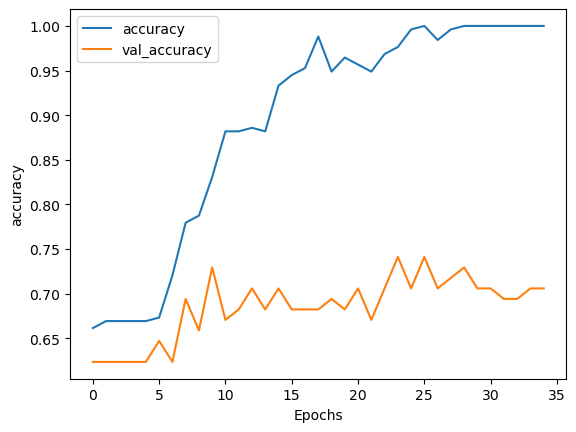

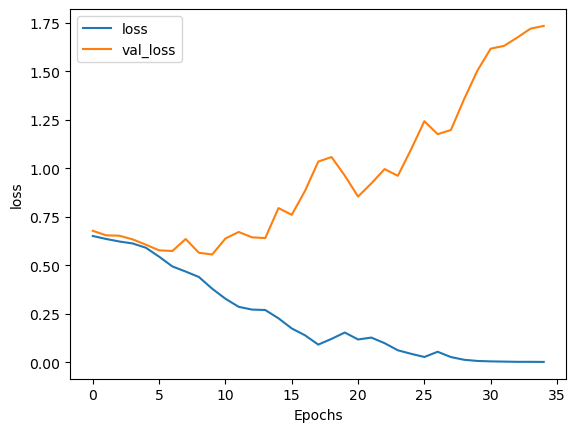

In [361]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [362]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.661417 	   0.651136 	   0.623529 	   0.677899
       2   0.669291 	   0.635816 	   0.623529 	   0.654658
       3   0.669291 	   0.622784 	   0.623529 	   0.652523
       4   0.669291 	   0.612809 	   0.623529 	   0.633825
       5   0.669291 	   0.590549 	   0.623529 	   0.606305
       6   0.673228 	   0.544482 	   0.647059 	   0.577169
       7   0.720472 	   0.494274 	   0.623529 	   0.573862
       8   0.779528 	   0.467967 	   0.694118 	   0.635638
       9   0.787402 	   0.439850 	   0.658824 	   0.564750
      10   0.830709 	   0.379570 	   0.729412 	   0.555829
      11   0.881890 	   0.327875 	   0.670588 	   0.638322
      12   0.881890 	   0.286231 	   0.682353 	   0.671871
      13   0.885827 	   0.272091 	   0.705882 	   0.644333
      14   0.881890 	   0.269898 	   0.682353 	   0.640205
      15   0.933071 	   0.227073 	   0.705882 	   0.794946
      16   0.944882 	   0.174796 	   0.682353 

In [363]:
y_pred = np.argmax(model.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model.evaluate(test_seqs, testY)

3/3 [==============================] - 2s 41ms/step - loss: 2.0304 - accuracy: 0.6353


In [364]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.44      0.39      0.42        28
           1       0.72      0.75      0.74        57

    accuracy                           0.64        85
   macro avg       0.58      0.57      0.58        85
weighted avg       0.63      0.64      0.63        85

